In [1]:
import numpy as np

In [177]:
class Forward:
    
    # NOTE: This constructor works, but there is a bug.
    # The derivative prints as an array even when a 
    # float is passed in as the first argument.
    def __init__(self, a, da=None):
        
        # Convert to arrays
        a = np.asarray(a)
        
        # Set function value(s)
        self._val = a.astype(float)
        
        # Set derivative value(s)
        if da is None:
            self._der = np.ones(a.size)
        else:
            self._der = da
        
    def __repr__(self):
        return f"Function value: {self._val}\nDerivative value: {self._der}"
    
    @property
    def val(self):
        return self._val
    
    @property
    def der(self):
        return self._der
    
    @val.setter
    def val(self, a):
        self._val = a
        
    @der.setter
    def der(self, da):
        self._der = da
    
    def __neg__(self):
        return Forward(-self._val, -self._der)
    
    def __add__(self, other):
        try:
            return Forward(self._val + other._val, self._der + other._der)
        except AttributeError:
            return Forward(self._val + other, self._der)
        
    def __radd__(self, other):
        return self._add__(other)
    
    def __sub__(self, other):
        return self.__add__(-other)
    
    def __rsub__(self, other):
        return self.__sub__(other)
    
    def __mul__(self, other):
        try:
            return Forward(self._val*other._val, self._val*other._der + self._der*other._val)
        except AttributeError:
            return Forward(other*self._val, other*self._der)
    
    def __rmul__(self, other):
        return self.__mul__(other)
    
    def __pow__(self, n):
        return Forward(self._val**n, n*self._val**(n-1)*self._der)

In [179]:
x = Forward(1)
x.val

array(1.)

In [151]:
type(x._val), type(x._der)

(numpy.ndarray, numpy.ndarray)

In [152]:
y = Forward([1, 2, 3])
y

Function value: [1. 2. 3.]
Derivative value: [1. 1. 1.]

In [153]:
-y

Function value: [-1. -2. -3.]
Derivative value: [-1. -1. -1.]

In [116]:
z = Forward([3., 4., 5.])

In [117]:
y + z

Function value: [4. 6. 8.]
Derivative value: [2. 2. 2.]

In [118]:
Forward(1.) + 3

Function value: 4.0
Derivative value: [1.]

In [119]:
a = np.asarray([1, 2, 3])
b = np.asarray([4, 5, 6])
Forward(a + b)

Function value: [5. 7. 9.]
Derivative value: [1. 1. 1.]

In [120]:
Forward(a+1)

Function value: [2. 3. 4.]
Derivative value: [1. 1. 1.]

In [166]:
def f(x):
    return x**3 + 3*x + 4

In [182]:
x = Forward(np.linspace(0., 4., 100))

In [183]:
import matplotlib.pyplot as plt

In [184]:
g = f(x)
x.val.size, g.val.size, g.der.size

(100, 100, 100)

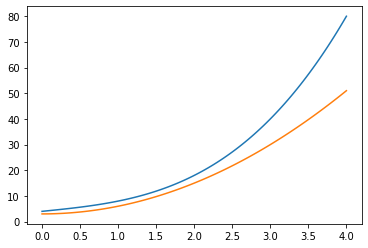

In [186]:
plt.plot(x.val, g.val)
plt.plot(x.val, g.der)